In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [24]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

- This dataset consists of 10,000 records, each representing a synthetic patient healthcare record.
- It includes various attributes, such as patient demographics, medical conditions, admission details, and more.
- The dataset is intended for educational and non-commercial use. It is entirely synthetic and does not contain real patient data.

## Cleaning ##

In [26]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [27]:
df.duplicated().sum()

0

- There are 0 null values.
- There are no duplicates. 

Our orginal dataset has 2 dates; one is for the day the patient was admitted and the second is when the patient was discharged. 
This next chunk of code will just convert that into the total number of days someone was in the hospital. 

In [28]:
for date in ['Date of Admission', 'Discharge Date']:
    df[date] = pd.to_datetime(df[date])
df['Days Hospitalized']=(df['Discharge Date']-df['Date of Admission']).dt.days
df['Days Hospitalized']= df['Days Hospitalized'].astype(int)
df['Days Hospitalized'].head()

0    14
1    14
2    30
3     1
4    24
Name: Days Hospitalized, dtype: int32

Next, we'll remove any columns that aren't helpful for our analysis. 

In [29]:
df = df.drop(columns = ['Name','Date of Admission','Discharge Date','Room Number'])
# Here are the columns we will keep. 
df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Days Hospitalized'],
      dtype='object')

Here is our cleaned dataset. It is now ready for EDA. 

In [30]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Days Hospitalized
0,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24


## EDA ##

____________________________________________________________________________________________________


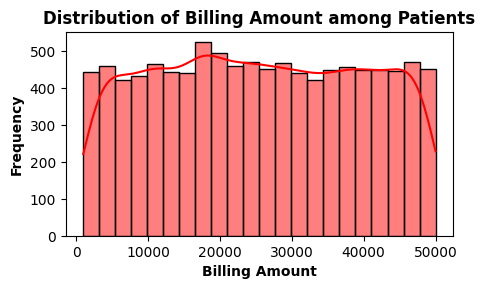

____________________________________________________________________________________________________


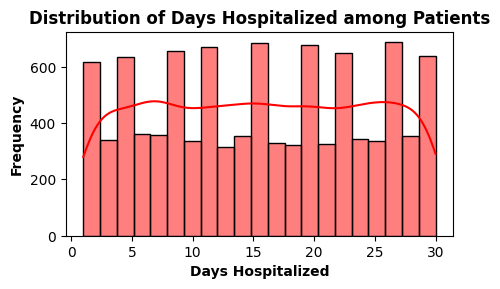

In [51]:
for col in df.columns:
    # this if statement will make sure that all the integer columns are visualized. 
    if df[col].dtype=='int' or df[col].dtype == 'float':
        plt.figure(figsize = (17,9))
        plt.style.use('seaborn-v0_8-dark-palette')
        
        plt.subplot(3,3,3)
        sns.histplot(df[col],kde = True,color = 'red')
        plt.ylabel('Frequency',fontsize = 10, weight='bold')
        plt.xlabel(col,fontsize = 10, weight='bold')
        plt.title(f'Distribution of {col} among Patients',fontsize = 12,weight = 'bold')
        print("_"*100)
        plt.show()

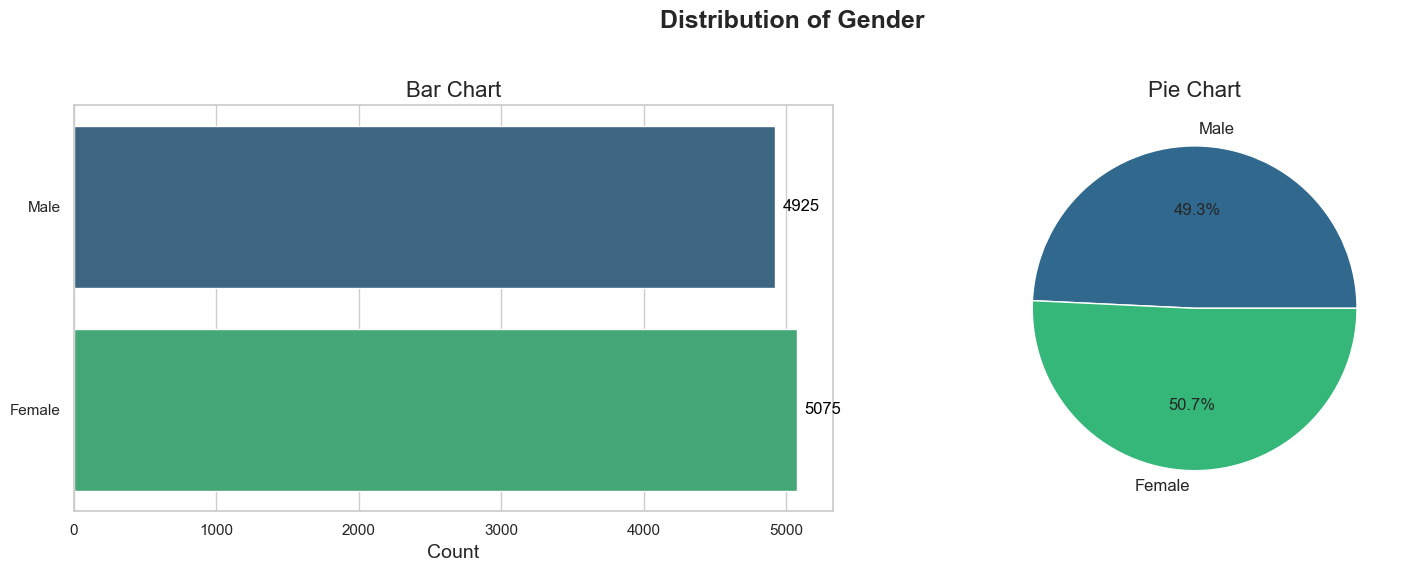

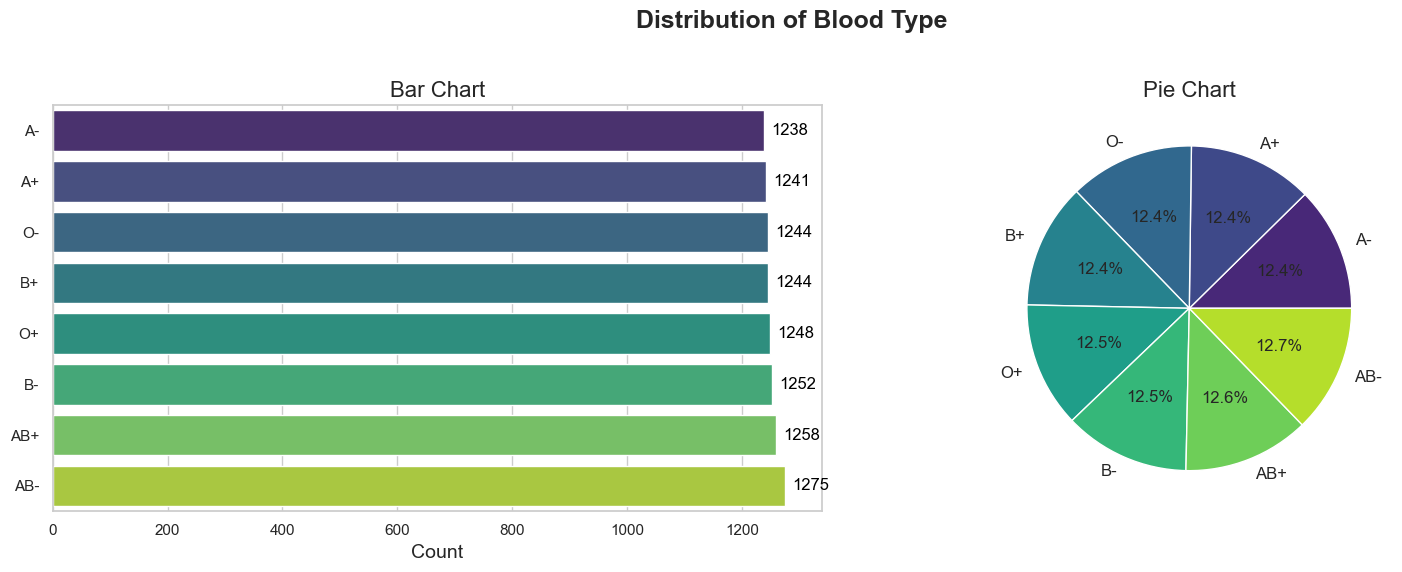

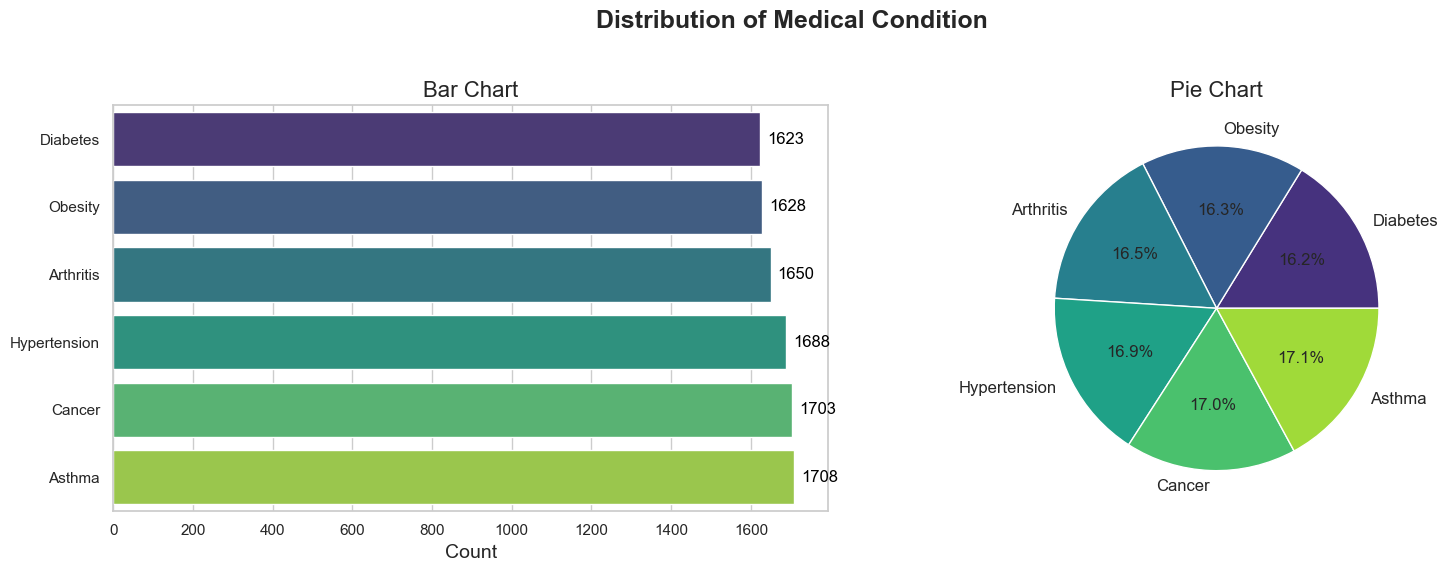

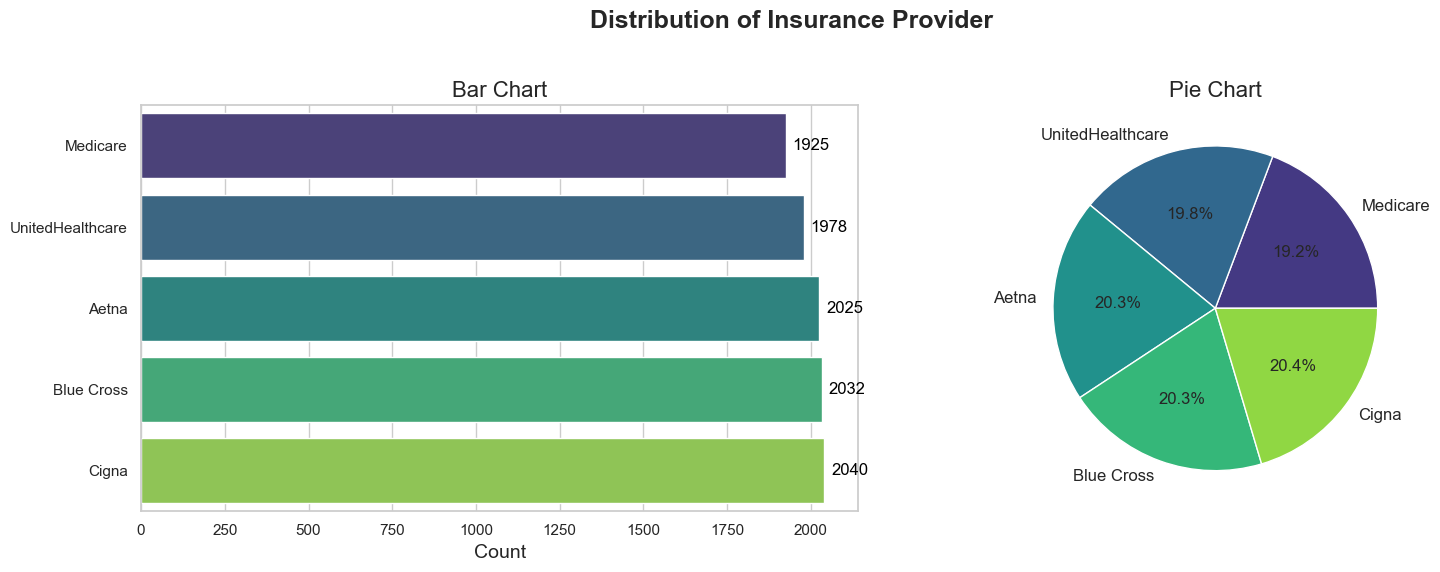

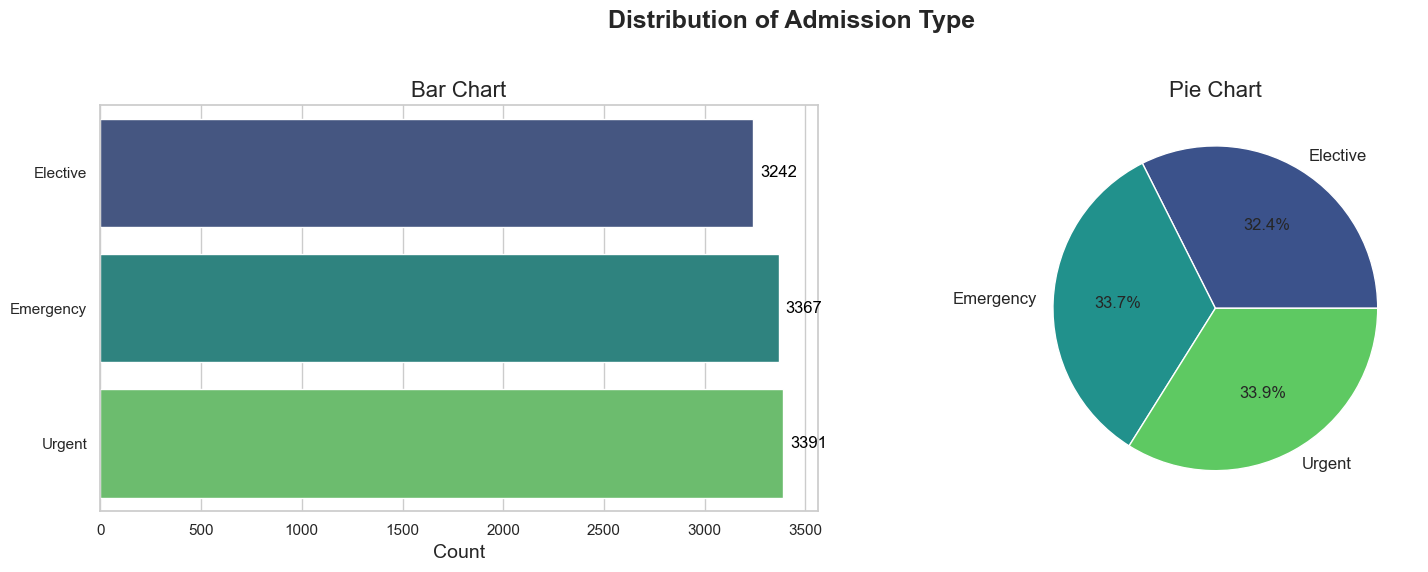

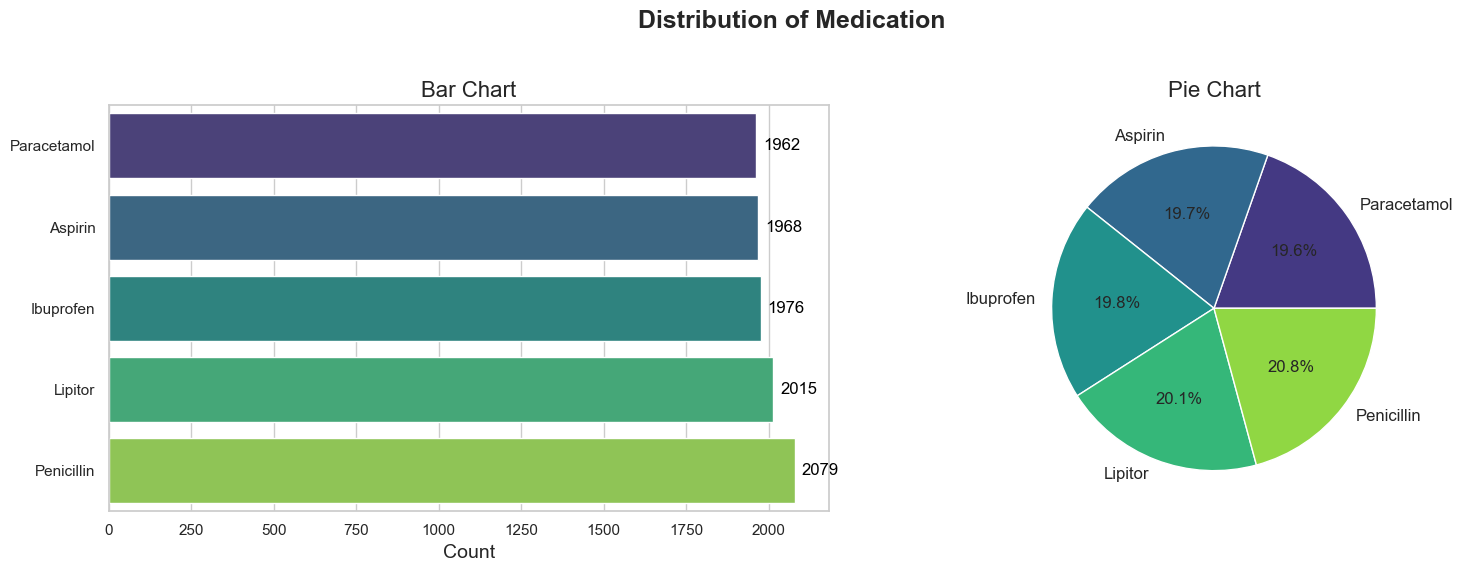

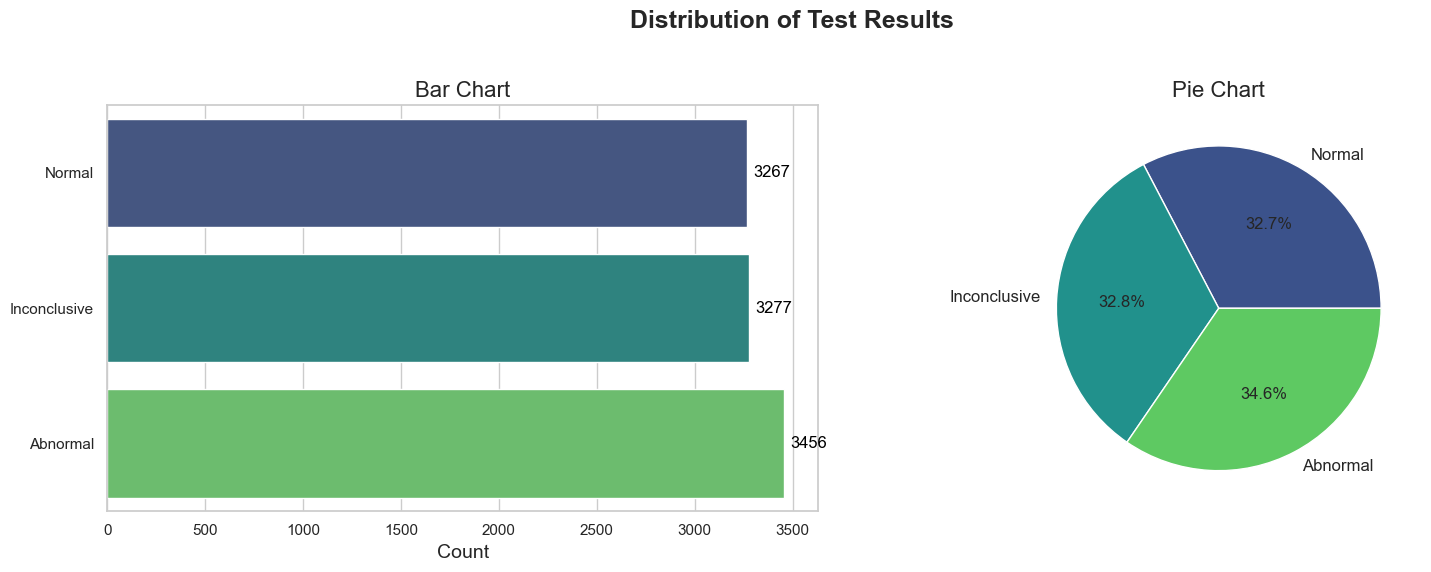

In [57]:
# Set a clean Seaborn theme
sns.set_theme(style="whitegrid")

def plot_categorical_distributions(df):
    for col in df.columns:
        if df[col].dtype == 'O' and col not in ['Doctor', 'Hospital']:
            # Compute category counts and sort them
            category_count = df[col].value_counts().sort_values()
            fig, axes = plt.subplots(1, 2, figsize=(16, 6))
            fig.suptitle(f'Distribution of {col}', fontsize=18, fontweight='bold', y=0.95)
            

            sns.barplot(x=category_count.values, y=category_count.index, 
                        ax=axes[0], palette="viridis")
            axes[0].set_xlabel('Count', fontsize=14)
            axes[0].set_ylabel('')
            axes[0].set_title('Bar Chart', fontsize=16)
            
            for i, v in enumerate(category_count.values):
                axes[0].text(v + max(category_count.values)*0.01, i, str(v),
                             color='black', va='center', fontsize=12)

            colors = sns.color_palette("viridis", len(category_count))
            axes[1].pie(category_count.values, labels=category_count.index, 
                        autopct='%1.1f%%', colors=colors, textprops={'fontsize': 12})
            axes[1].set_title('Pie Chart', fontsize=16)
            
            plt.tight_layout(rect=[0, 0, 1, 0.93])
            plt.show()

plot_categorical_distributions(df)

# Distribution of Medical Conditions by Gender of Paient

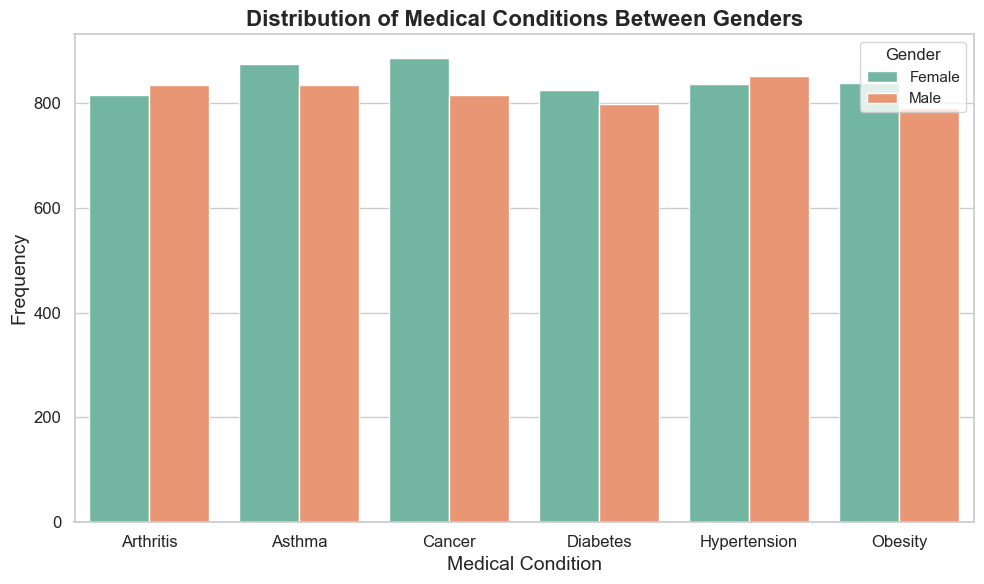

In [60]:
gender_medical = df.groupby(['Medical Condition', 'Gender']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Medical Condition', y='Count', hue='Gender', data=gender_medical, palette='Set2')
plt.title('Distribution of Medical Conditions Between Genders', fontsize=16, weight='bold')
plt.xlabel('Medical Condition', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Correlation Matrix: Age, Billing Amount, Days Hospitalized, and More

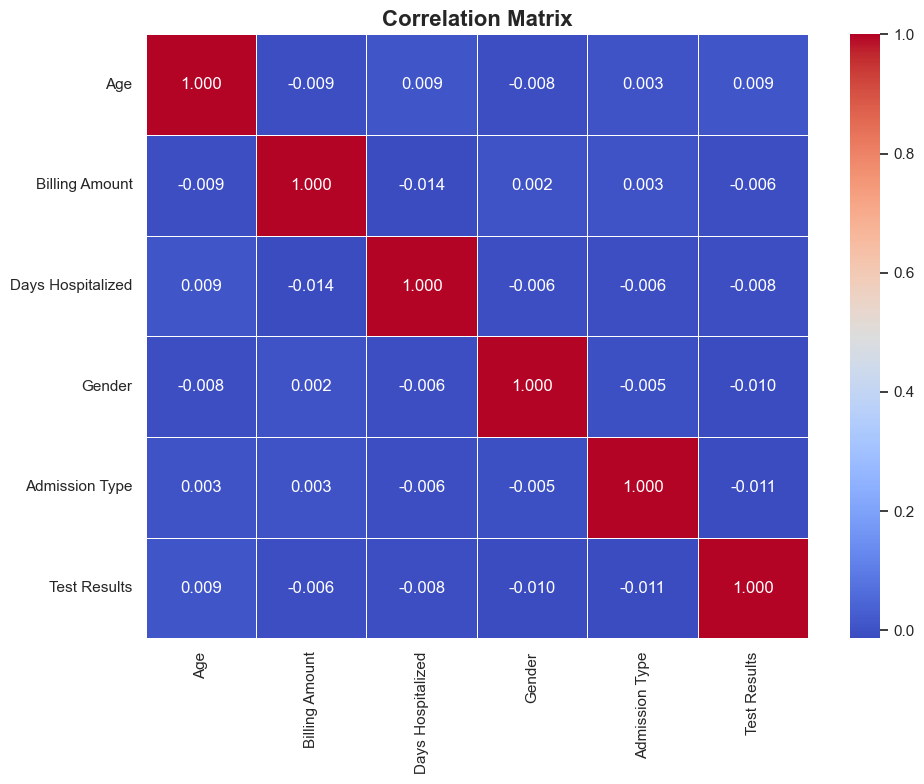

In [61]:
# Select the columns for correlation analysis (including categorical features to be encoded)
correlation_columns = ['Age', 'Billing Amount', 'Days Hospitalized', 'Gender', 'Admission Type', 'Test Results']
correlate_df = df[correlation_columns].copy()

# Encode categorical columns
for col in ['Gender', 'Admission Type', 'Test Results']:
    correlate_df[col] = df[col].astype('category').cat.codes

# Compute the correlation matrix
correlation_matrix = correlate_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


There is a slight positive correlation between age and days hospitalized, a negative correlation between age and billing amount, and varying relationships among other variables.

# Total Billing Amount for Top 10 Hospitals

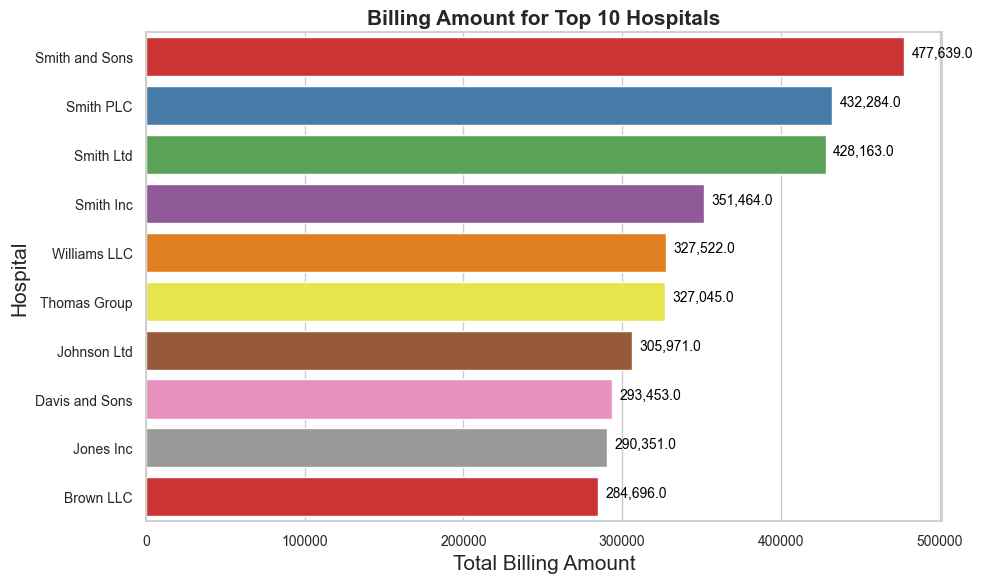

In [62]:
# Aggregate the total billing amount per hospital and get the top 10
top10_hospital_billing = (
    df.groupby('Hospital')['Billing Amount']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Billing Amount', y='Hospital', data=top10_hospital_billing, palette='Set1')
# Annotate each bar with the billing amount
for index, value in enumerate(top10_hospital_billing['Billing Amount']):
    ax.text(value + max(top10_hospital_billing['Billing Amount']) * 0.01, 
            index, f'{round(value, 0):,}', color='black', fontsize=10)
plt.xlabel('Total Billing Amount', fontsize=15)
plt.ylabel('Hospital', fontsize=15)
plt.title('Billing Amount for Top 10 Hospitals', fontsize=15, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

- There is a slight positive correlation between age and both test results and days hospitalized, but a negative correlation with billing amount.  
- Billing amount negatively correlates with test results and days hospitalized but shows a positive correlation with admission type and gender.  
- Days hospitalized is negatively correlated with all attributes except age.  
- Gender has a negative correlation with all attributes except billing amount.  
- Admission type and test results also have a negative correlation.

# Top 10 Doctors by Billing Amount


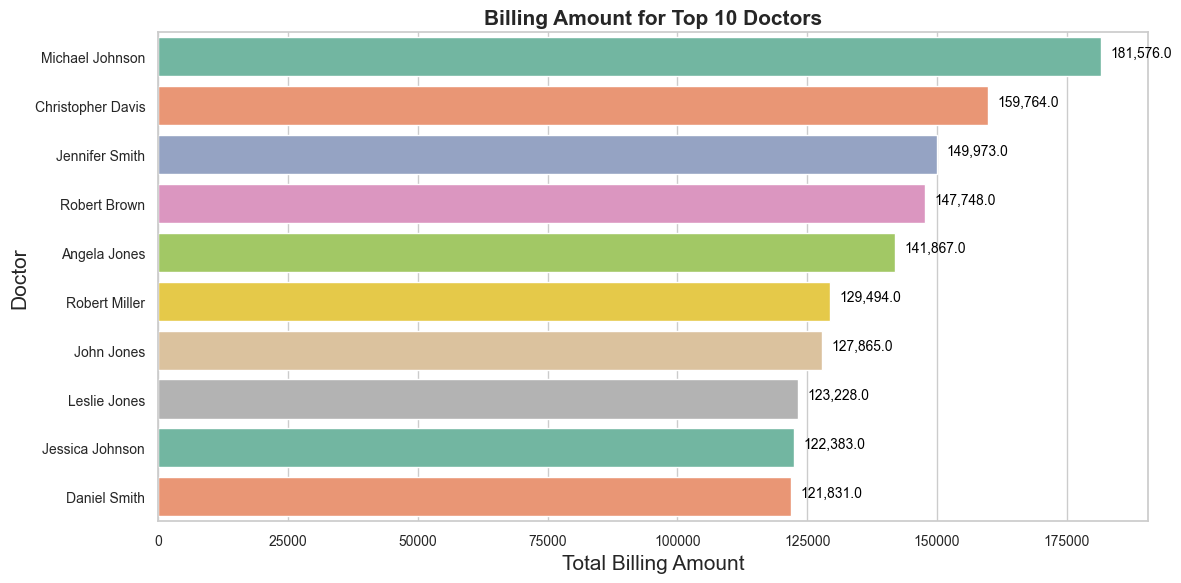

In [63]:
# Sum the billing amounts per doctor and get the top 10
top20_doctors_billing = (
    df.groupby('Doctor')['Billing Amount']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Billing Amount', y='Doctor', data=top20_doctors_billing, palette='Set2')
# Annotate each bar with the billing amount
for index, value in enumerate(top20_doctors_billing['Billing Amount']):
    ax.text(value + max(top20_doctors_billing['Billing Amount']) * 0.01, 
            index, f'{round(value, 0):,}', color='black', fontsize=10)
plt.xlabel('Total Billing Amount', fontsize=15)
plt.ylabel('Doctor', fontsize=15)
plt.title('Billing Amount for Top 10 Doctors', fontsize=15, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Smith and Sons records the highest total billing amount among hospitals. Among doctors, Michael Johnson tops the list with the highest billing.

# Average Billing Amount by Medical Condition and Gender


C:\Users\Cesar Gutierrez\AppData\Local\Temp\ipykernel_10832\880819376.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Medical Condition', y='Billing Amount', hue='Gender',


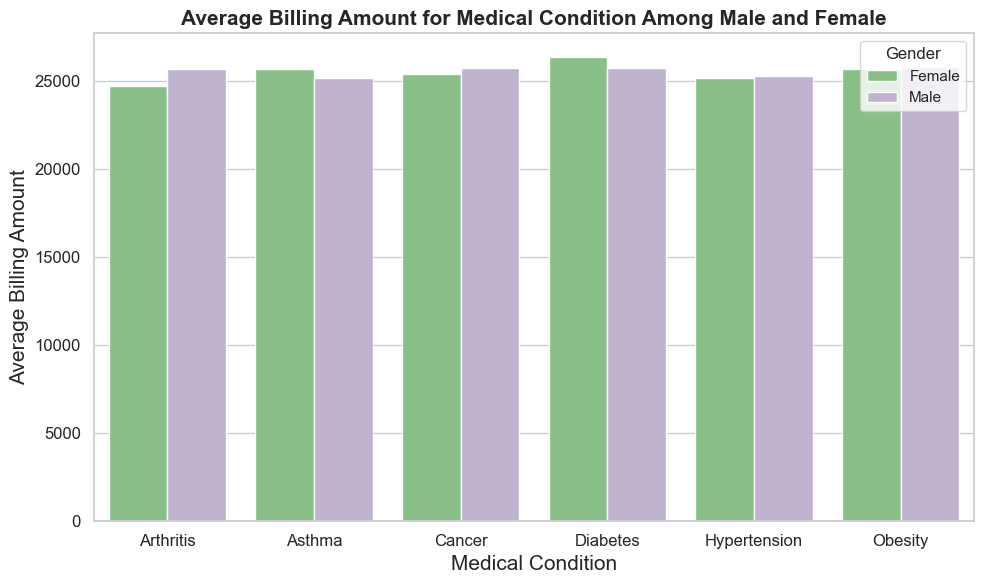

In [64]:
# Calculate the average billing amount grouped by 'Medical Condition' and 'Gender'
medical_gender_billing = (
    df.groupby(['Medical Condition', 'Gender'])['Billing Amount']
      .mean()
      .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(x='Medical Condition', y='Billing Amount', hue='Gender',
            data=medical_gender_billing, ci=None, palette='Accent')
plt.xlabel('Medical Condition', fontsize=15)
plt.ylabel('Average Billing Amount', fontsize=15)
plt.title('Average Billing Amount for Medical Condition Among Male and Female', fontsize=15, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


The average billing amounts vary by medical condition and gender, indicating different cost patterns across conditions.

# Distribution of Different Age Groups

In [65]:
# Display the age range
min_age = df['Age'].min()
max_age = df['Age'].max()
print(f"Age range: {min_age} to {max_age}")

# Create age groups using pd.cut()
df['Age_Group'] = pd.cut(
    df['Age'], 
    bins=[18, 30, 40, 50, 60, 70, 80, float('inf')],
    labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', 'Over 80'],
    right=False
)

Age range: 18 to 85


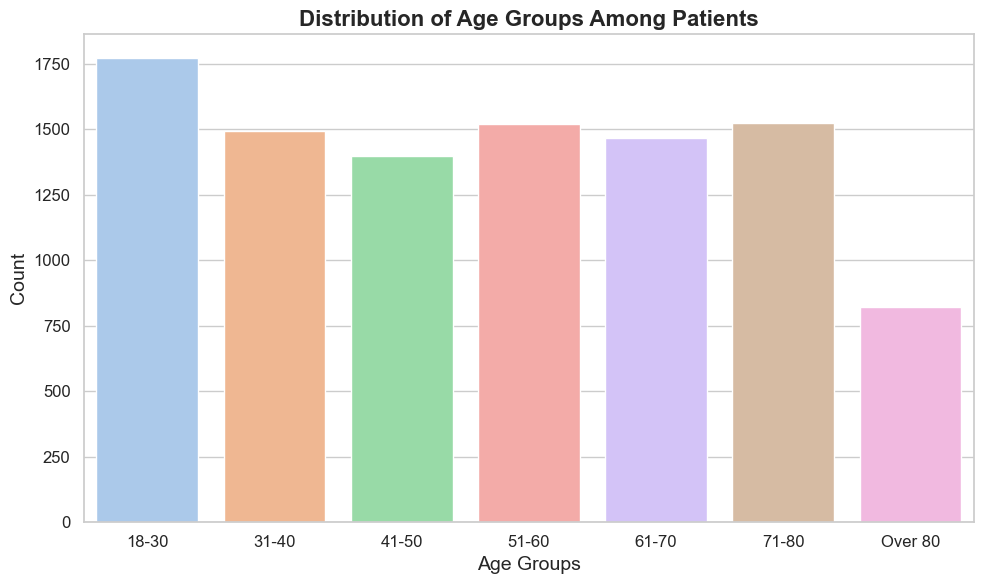

In [66]:
# Count the number of patients in each age group and sort by the natural order of the groups
age_group_counts = df['Age_Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='pastel')
plt.title('Distribution of Age Groups Among Patients', fontsize=16, weight='bold')
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


The largest patient group falls within the 18-30 age range.

# Overall Conclusion:
- A higher number of female patients is observed.
- Most patients have AB blood type.
- Asthma is the most common medical condition.
- Cigna is the leading insurance provider, and
- Penicillin is the most prescribed medication.